# Predicting Student Scores

In this analysis, we aim to investigate the factors influencing students' scores through the application of multiple linear regression. This statistical technique allows us to model the relationship between various independent variables and the dependent variable, which in this case is the math,reading and writing scores. By considering multiple factors simultaneously, we can gain valuable insights into how variables such as parental level of education, test preparation, lunch type, and gender collectively impact a student's performance.

# Imports and Data Wrangling

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from collections import namedtuple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print('Imports successful')

Imports successful


In [55]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [5]:
df = pd.read_csv("../data/cleaned_students_performance.csv")

# Multiple Linear Regression

In [8]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [78]:
def regress( output_col : list, input_cols=['Parental Level Of Education', 'Test Preparation Course', 'Lunch', 'Gender'],test_size=0.20):
    """This function returns the expected value and the predicted value of the regression model
    created as well as the r-squared and error"""
    
    input_cols = input_cols
    output_col = output_col
    X = pd.get_dummies(df[input_cols],drop_first=True)
    y = df[output_col]

    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = test_size)

    # Set up and fit the linear regressor
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Flatten the prediction and expected lists
    predicted = flatten(model.predict(X_test))
    expected = flatten(y_test.values)

    result = pd.DataFrame({'expected':expected, 'predicted':predicted})

    error = np.sqrt(np.mean((np.array(predicted) - np.array(expected)) ** 2))
    error = round(error,4) 

    r2=r2_score(expected, predicted)
    r2 = round(r2,4)
    
    result_tuple = namedtuple('regression_results',['result','error','r2'])
    result = result_tuple(result,error,r2)
    return result

Text(0.5, 0.98, 'Predicted vs. Actual Values')

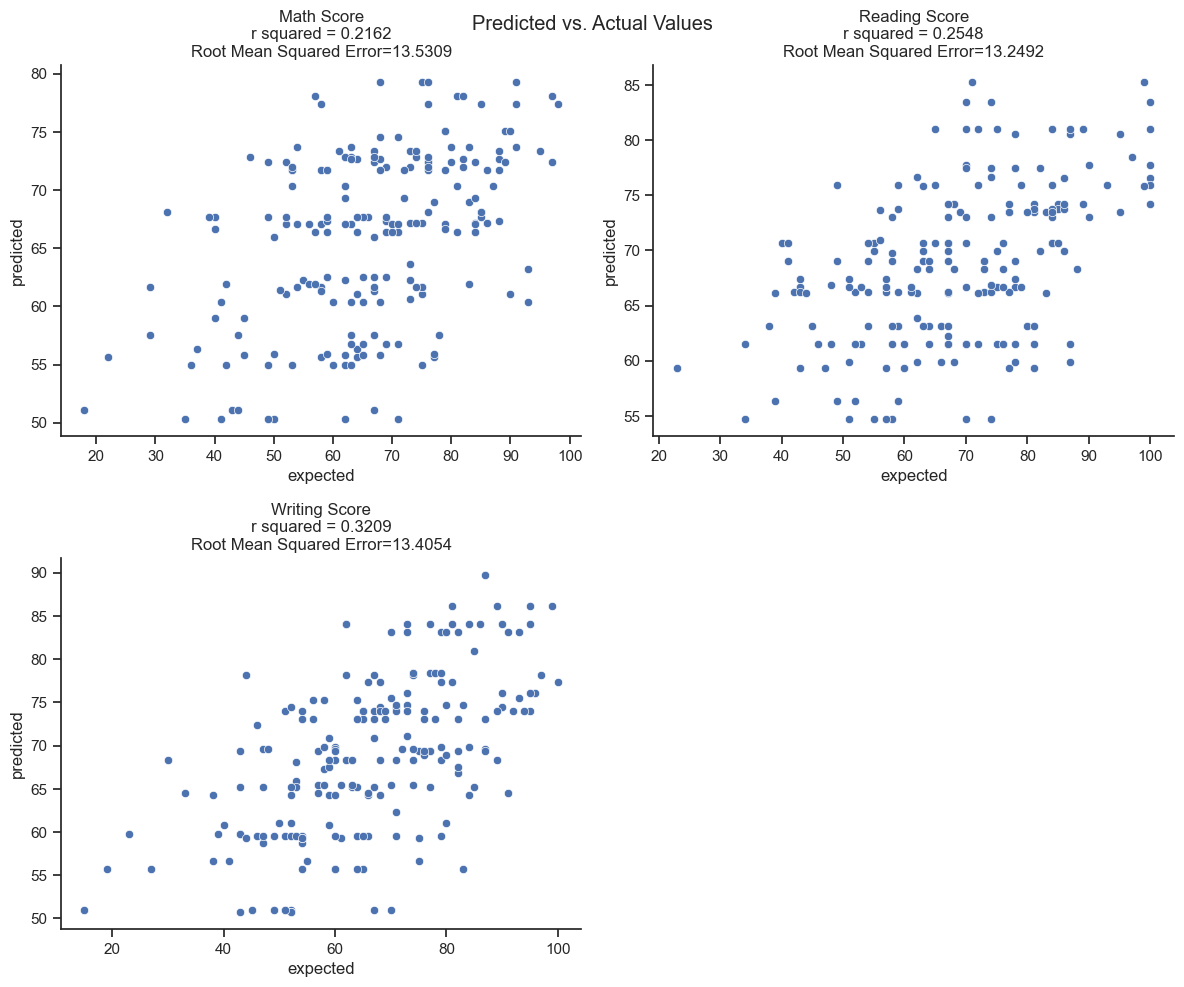

In [77]:
math_regress = regress(['Math Score'])
writing_regress = regress(['Writing Score'])
reading_regress = regress(['Reading Score'])

subjects = ['Math Score', 'Reading Score', 'Writing Score']

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.flatten()
for i , subject in enumerate(subjects):
    subject_regress = regress([subject])
    sns.scatterplot(data=subject_regress.result, x='expected', y='predicted',ax=ax[i])
    
    ax[i].set_title(f"{subject}\nr squared = {subject_regress.r2}\nRoot Mean Squared Error={subject_regress.error}")
fig.delaxes(ax[3])
plt.tight_layout()
plt.subplots_adjust(top=0.93)
fig.suptitle('Predicted vs. Actual Values')

The r-squared values for the math, reading and writing linear models are low. the results suggest that the model has some predictive power,(The multiple linear regression models explain about 20-30% of the variability) but there is room for improvement.

The R-squared value may be low because there are important factors missing in the data. For example, how much time a student spends studying and how naturally good they are at math, reading and writing are extremly important factors, however we don't have that information in the dataset.

The Root Mean Squared Error (RMSE) is around 13 for all subjects, this value suggests that the model's predictions have some level of error. It means that the model's predictions deviate from the true scores by about 13.0485 points.
Therefore, even though we're trying to predict scores using the data we have, there are other factors that we're not considering.

If we had info about how much a student studies and how naturally good they are at a particular subject, our predictions might be much better. But even then, there could still be other hidden factors we're not aware of.